___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
#!pip install -U scikit-learn

In [3]:
import sklearn
sklearn.__version__

'1.2.1'

In [4]:
df = pd.read_csv("final_scout_not_dummy2.csv")

In [5]:
df.head()

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,"Alloy wheels, Catalytic Converter, Voice Control",7.000,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800,99.000,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,"Alloy wheels, Sport seats, Sport suspension, V...",7.000,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600,129.000,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,"Alloy wheels, Voice Control",7.000,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800,99.000,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,"Alloy wheels, Sport seats, Voice Control",6.000,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800,99.000,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,"Alloy wheels, Sport package, Sport suspension,...",7.000,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100,109.000,Premium,Plus,Safety Premium Package


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   15909 non-null  object 
 1   body_type                    15909 non-null  object 
 2   price                        15909 non-null  int64  
 3   km                           15909 non-null  float64
 4   Type                         15909 non-null  object 
 5   Fuel                         15909 non-null  object 
 6   Extras                       15909 non-null  object 
 7   Gears                        15909 non-null  float64
 8   age                          15909 non-null  float64
 9   Previous_Owners              15909 non-null  float64
 10  hp_kW                        15909 non-null  float64
 11  Inspection_new               15909 non-null  int64  
 12  Paint_Type                   15909 non-null  object 
 13  Upholstery_type 

In [315]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
count,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000
mean,18020.242,32092.437,5.937,1.390,1.043,88.494,0.247,1428.657,1337.675,4.824,117.783
std,7377.201,36982.839,0.705,1.121,0.339,26.672,0.431,275.852,199.672,0.888,18.023
min,4950.000,0.000,5.000,0.000,0.000,40.000,0.000,890.000,840.000,3.000,45.000
25%,12850.000,1913.000,5.000,0.000,1.000,66.000,0.000,1229.000,1165.000,4.000,104.000
50%,16900.000,20410.000,6.000,1.000,1.000,85.000,0.000,1461.000,1295.000,4.800,117.000
75%,21900.000,46900.000,6.000,2.000,1.000,103.000,0.000,1598.000,1472.000,5.400,129.000
max,74600.000,317000.000,8.000,3.000,4.000,294.000,1.000,2967.000,2471.000,9.100,253.000


In [316]:
df.isnull().sum()

make_model                     0
body_type                      0
price                          0
km                             0
Type                           0
Fuel                           0
Extras                         0
Gears                          0
age                            0
Previous_Owners                0
hp_kW                          0
Inspection_new                 0
Paint_Type                     0
Upholstery_type                0
Gearing_Type                   0
Displacement_cc                0
Weight_kg                      0
Drive_chain                    0
cons_comb                      0
CO2_Emission                   0
Comfort_Convenience_Package    0
Entertainment_Media_Package    0
Safety_Security_Package        0
dtype: int64

## Feature Engineering

In [317]:
df_object = df.select_dtypes(include ="object").head()
df_object

# With select_dtypes(include ="object") code, we can filter object features in df.

,make_model,body_type,Type,Fuel,Extras,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,Used,Diesel,"Alloy wheels, Catalytic Converter, Voice Control",Metallic,Cloth,Automatic,front,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,Used,Benzine,"Alloy wheels, Sport seats, Sport suspension, V...",Metallic,Cloth,Automatic,front,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,Used,Diesel,"Alloy wheels, Voice Control",Metallic,Cloth,Automatic,front,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,Used,Diesel,"Alloy wheels, Sport seats, Voice Control",Metallic,Cloth,Automatic,front,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,Used,Diesel,"Alloy wheels, Sport package, Sport suspension,...",Metallic,Cloth,Automatic,front,Premium,Plus,Safety Premium Package


In [318]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

# With <20, a 30-character space is left from the leftmost to the ":" sign and feature names are printed in this space.
# The ":" sign is aligned on all lines.

make_model                    : 8
body_type                     : 8
Type                          : 5
Fuel                          : 3
Extras                        : 659
Paint_Type                    : 3
Upholstery_type               : 2
Gearing_Type                  : 3
Drive_chain                   : 3
Comfort_Convenience_Package   : 3
Entertainment_Media_Package   : 2
Safety_Security_Package       : 3


### Converting the Extras feature from object to numeric

In [319]:
for i in df.Extras:
    print(i)

# Since we want the model to give more weight to cars with more features, 
# we will count the features here and assign the numbers we find to the places of the categorical features here.

Alloy wheels, Catalytic Converter, Voice Control
Alloy wheels, Sport seats, Sport suspension, Voice Control
Alloy wheels, Voice Control
Alloy wheels, Sport seats, Voice Control
Alloy wheels, Sport package, Sport suspension, Voice Control
Alloy wheels, Sport package, Sport seats, Sport suspension
Alloy wheels, Sport package, Sport seats, Sport suspension
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Shift paddles
Alloy wheels, Sport seats
Alloy wheels, Catalytic Converter, Sport package, Sport seats, Sport suspension, Voice Control
Alloy wheels, Sport seats, Sport suspension
Alloy wheels, Sport seats, Sport suspension
Alloy wheels
Alloy wheels, Sport package, Sport seats
Alloy wheels, Sport package
Alloy wheels
Alloy wheels, Catalytic Converter, Shift paddles, Voice Control
Alloy wheels, Shift paddles, Sport package, Voice Control
Alloy wheels, Sport seats, Voice Control
Alloy wheels, Catalytic Converter, Sport seats, Voice Control, Winter tyres
Alloy wheels
Alloy wheels, Voice C

Alloy wheels, Catalytic Converter, Sport seats
Alloy wheels, Catalytic Converter, Sport seats, Voice Control
Alloy wheels, Catalytic Converter, Sport suspension, Voice Control
Alloy wheels, Sport seats
Alloy wheels, Sport seats, Sport suspension
Alloy wheels
Alloy wheels, Sport seats, Voice Control
Alloy wheels, Sport seats, Voice Control
Alloy wheels, Sport package, Sport seats, Sport suspension, Voice Control
Alloy wheels, Sport seats, Voice Control
Alloy wheels, Voice Control
Alloy wheels, Sport seats, Voice Control
Alloy wheels, Sport seats, Sport suspension, Voice Control
Alloy wheels, Catalytic Converter, Sport seats, Sport suspension
Alloy wheels, Cab or rented Car, Sport seats, Voice Control
Alloy wheels, Sport package, Voice Control
Alloy wheels, Cab or rented Car, Sport seats, Voice Control
Alloy wheels, Cab or rented Car, Sport seats, Voice Control
Alloy wheels, Cab or rented Car, Sport seats, Voice Control
Alloy wheels, Cab or rented Car, Sport seats, Voice Control
Alloy wh

Alloy wheels, Sport seats, Touch screen
Alloy wheels, Sport seats, Touch screen
Alloy wheels, Sport seats
Alloy wheels, Sport seats
Alloy wheels, Catalytic Converter
Alloy wheels
Alloy wheels
Alloy wheels
Catalytic Converter, Voice Control
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Voice Control
Alloy wheels, Catalytic Converter
Alloy wheels, Voice Control
Alloy wheels
Alloy wheels, Catalytic Converter, Winter tyres
Alloy wheels, Catalytic Converter, Winter tyres
Alloy wheels, Voice Control
Alloy wheels, Voice Control
Alloy wheels, Catalytic Converter, Winter tyres
Alloy wheels, Catalytic Converter, Winter tyres
Alloy wheels, Catalytic Converter, Voice Control
Alloy wheels
Alloy wheels
Alloy wheels, Touch screen
Catalytic Converter, Touch screen
Catalytic Converter, Winter tyres
Alloy wheels
Alloy wheels
Alloy wheels
Voice Control
Alloy wheels, Catalytic Converter, Sport seats, Sport suspension, Voice Control
Alloy wheels, Catalytic Converter
Alloy wheels, Catalytic Converter

Alloy wheels, Sport suspension, Voice Control
Alloy wheels, Sport suspension, Voice Control
Alloy wheels, Sport suspension, Voice Control
Alloy wheels, Catalytic Converter, Ski bag, Sport package, Sport seats, Sport suspension, Voice Control
Alloy wheels, Sport suspension
Alloy wheels
Alloy wheels
Alloy wheels, Catalytic Converter
Alloy wheels, Sport package, Sport seats
Alloy wheels
Alloy wheels, Shift paddles
Alloy wheels, Catalytic Converter, Roof rack, Shift paddles, Sport package
Alloy wheels, Sport suspension
Alloy wheels, Voice Control
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Voice Control
Alloy wheels
Alloy wheels, Sport suspension
Alloy wheels
Alloy wheels
Alloy wheels, Catalytic Converter, Roof rack, Voice Control, Winter tyres
Alloy wheels
Alloy wheels
Alloy wheels, Voice Control
Alloy wheels
Alloy wheels
Alloy wheels, Sport package
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Sport seats
Alloy wheels
Alloy wheels, Catalytic Converter, Sport package, Spor

Catalytic Converter
Alloy wheels
Alloy wheels, Catalytic Converter, Sport seats, Sport suspension, Touch screen
Alloy wheels, Sport package, Sport seats, Sport suspension, Trailer hitch
Alloy wheels
Alloy wheels, Catalytic Converter, Roof rack, Sport seats, Sport suspension
Alloy wheels
Alloy wheels, Roof rack
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Roof rack, Touch screen, Voice Control
Alloy wheels
Alloy wheels
Alloy wheels, Voice Control
Alloy wheels
Alloy wheels, Cab or rented Car
Alloy wheels, Voice Control
Catalytic Converter
Alloy wheels
Alloy wheels, Sport suspension
Alloy wheels, Sport suspension
Alloy wheels, Sport suspension
Alloy wheels, Sport suspension
Alloy wheels, Sport suspension
Catalytic Converter
Alloy wheels, Voice Control
Alloy wheels
Alloy wheels, Sport package, Sport seats
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Touch screen
Alloy wheels
Alloy wheels
Alloy wheels, Sport seats
Alloy wheels, Sport package, Sport seats, Sport 

Alloy wheels, Voice Control
Roof rack
Alloy wheels
Alloy wheels
Touch screen, Voice Control
Trailer hitch
Trailer hitch
Alloy wheels, Roof rack
Touch screen
Alloy wheels
Roof rack
Alloy wheels, Roof rack, Voice Control
Catalytic Converter, Touch screen
Voice Control
Alloy wheels
Sport seats
Catalytic Converter, Roof rack, Sport seats
Roof rack, Ski bag, Sport seats, Voice Control, Winter tyres
Alloy wheels
Alloy wheels
Catalytic Converter, Roof rack, Voice Control
Alloy wheels
Alloy wheels, Roof rack
Voice Control
Alloy wheels, Touch screen, Voice Control
Alloy wheels
Touch screen
Alloy wheels, Cab or rented Car
Alloy wheels
Alloy wheels, Catalytic Converter, Voice Control
Roof rack
Alloy wheels
Alloy wheels
Touch screen
Touch screen
Alloy wheels, Touch screen
Roof rack
Alloy wheels
Alloy wheels
Roof rack, Touch screen
Alloy wheels
Touch screen, Voice Control
Alloy wheels, Catalytic Converter, Touch screen, Voice Control
Alloy wheels, Catalytic Converter, Sport package, Sport seats, To

Alloy wheels
Alloy wheels, Touch screen
Alloy wheels
Alloy wheels, Touch screen
Alloy wheels, Sport seats, Touch screen, Voice Control
Touch screen
Alloy wheels
Alloy wheels
Alloy wheels, Touch screen
Roof rack
Alloy wheels
Alloy wheels, Touch screen
Alloy wheels, Touch screen
Touch screen
Roof rack
Roof rack
Roof rack
Roof rack
Roof rack
Roof rack
Catalytic Converter, Touch screen, Voice Control
Alloy wheels
Alloy wheels, Touch screen
Alloy wheels, Touch screen
Alloy wheels, Voice Control
Alloy wheels
Alloy wheels
Alloy wheels, Touch screen, Voice Control
Alloy wheels
Roof rack
Alloy wheels
Sport seats, Voice Control
Alloy wheels, Sport seats, Touch screen, Voice Control
Alloy wheels
Catalytic Converter, Touch screen, Voice Control
Alloy wheels
Alloy wheels, Roof rack, Touch screen
Alloy wheels
Alloy wheels, Touch screen, Voice Control
Alloy wheels, Touch screen, Voice Control
Alloy wheels
Alloy wheels
Alloy wheels, Touch screen, Voice Control
Alloy wheels, Touch screen, Voice Control

Alloy wheels
Alloy wheels, Voice Control
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Voice Control
Touch screen
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Catalytic Converter, Touch screen, Voice Control
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Catalytic Converter
Alloy wheels
Alloy wheels
Catalytic Converter
Alloy wheels
Catalytic Converter, Trailer hitch
Alloy wheels
Alloy wheels, Catalytic Converter, Trailer hitch, Voice Control
Alloy wheels, Sport package, Sport seats, Voice Control
Alloy wheels
Voice Control
Alloy wheels
Alloy wheels, Touch screen
Alloy wheels, Sport package, Sport seats, Touch screen, Voice Control
Alloy wheels
Alloy wheels, Sport package, Sport seats, Touch screen, Voice Control
Alloy wheels, Sport package, Sport seats, Touch screen, Voice Control
Alloy wheels, Sport package, Sport seats, Touch screen, Voice Control
Alloy wheels, Catalytic Converter
Alloy wheels
Alloy wheels
Alloy 

Alloy wheels, Touch screen, Voice Control
Alloy wheels, Touch screen, Voice Control
Alloy wheels, Catalytic Converter, Touch screen, Voice Control
Alloy wheels, Catalytic Converter, Touch screen, Voice Control
Alloy wheels, Voice Control
Alloy wheels, Catalytic Converter, Touch screen
Alloy wheels, Touch screen
Alloy wheels, Touch screen
Alloy wheels, Touch screen
Alloy wheels, Touch screen, Voice Control
Alloy wheels, Touch screen, Voice Control
Alloy wheels, Touch screen, Voice Control
Alloy wheels, Touch screen, Voice Control
Alloy wheels, Touch screen, Voice Control
Alloy wheels, Catalytic Converter
Alloy wheels, Catalytic Converter
Alloy wheels, Catalytic Converter
Alloy wheels, Catalytic Converter
Alloy wheels
Alloy wheels, Catalytic Converter, Touch screen
Alloy wheels, Sport suspension
Alloy wheels, Touch screen
Alloy wheels, Catalytic Converter
Alloy wheels, Voice Control
Alloy wheels, Touch screen
Alloy wheels
Catalytic Converter
Alloy wheels, Touch screen, Voice Control
Allo

Touch screen
Alloy wheels, Catalytic Converter, Roof rack
Alloy wheels, Roof rack, Sport suspension
Alloy wheels, Sport seats, Touch screen, Voice Control
Alloy wheels, Touch screen, Trailer hitch
Alloy wheels, Roof rack, Touch screen
Alloy wheels, Roof rack
Alloy wheels, Catalytic Converter, Roof rack, Touch screen, Voice Control
Alloy wheels, Sport seats
Alloy wheels, Sport seats, Touch screen
Alloy wheels, Touch screen, Voice Control
Alloy wheels, Catalytic Converter, Touch screen
Roof rack, Touch screen, Voice Control
Alloy wheels, Roof rack
Alloy wheels, Roof rack
Alloy wheels, Roof rack
Alloy wheels, Roof rack
Alloy wheels
Alloy wheels, Touch screen, Voice Control
Alloy wheels, Touch screen, Voice Control
Alloy wheels, Catalytic Converter, Roof rack
Alloy wheels, Touch screen, Voice Control
Alloy wheels
Alloy wheels
Alloy wheels, Touch screen, Voice Control
Alloy wheels
Alloy wheels, Touch screen, Voice Control
Alloy wheels
Alloy wheels, Touch screen, Voice Control
Alloy wheels
A

Alloy wheels, Catalytic Converter, Touch screen, Voice Control
Alloy wheels
Catalytic Converter, Touch screen, Voice Control
Alloy wheels, Roof rack
Alloy wheels, Roof rack, Touch screen, Trailer hitch, Voice Control
Alloy wheels, Catalytic Converter, Roof rack, Shift paddles, Sport package, Sport seats, Sport suspension, Touch screen, Voice Control
Alloy wheels
Alloy wheels, Sport seats, Touch screen
Alloy wheels
Alloy wheels
Alloy wheels, Roof rack, Shift paddles, Sport package, Sport seats, Sport suspension, Touch screen, Trailer hitch, Voice Control
Alloy wheels, Catalytic Converter, Sport package, Sport seats, Sport suspension, Touch screen
Alloy wheels, Catalytic Converter, Touch screen, Voice Control
Alloy wheels, Catalytic Converter, Roof rack, Shift paddles, Sport package, Sport seats, Sport suspension, Touch screen, Voice Control
Alloy wheels, Roof rack, Shift paddles, Touch screen, Voice Control
Alloy wheels
Alloy wheels, Roof rack, Voice Control
Alloy wheels, Roof rack, Tra

Alloy wheels
Alloy wheels, Shift paddles, Sport suspension
Alloy wheels, Shift paddles, Sport suspension
Alloy wheels, Touch screen
Alloy wheels, Roof rack
Alloy wheels, Shift paddles, Sport suspension
Alloy wheels, Shift paddles, Sport suspension
Alloy wheels, Shift paddles, Sport suspension
Alloy wheels, Shift paddles, Sport suspension
Alloy wheels, Shift paddles, Sport suspension
Alloy wheels, Shift paddles, Sport suspension
Alloy wheels, Sport suspension
Alloy wheels, Shift paddles, Sport suspension
Alloy wheels, Shift paddles, Sport suspension
Alloy wheels
Alloy wheels
Alloy wheels, Shift paddles, Sport seats, Sport suspension, Voice Control
Alloy wheels, Catalytic Converter, Shift paddles, Sport package, Sport seats, Sport suspension, Touch screen, Tuned car, Voice Control
Alloy wheels, Shift paddles, Sport seats, Sport suspension, Touch screen, Voice Control
Alloy wheels, Shift paddles, Sport seats, Sport suspension, Touch screen
Alloy wheels, Shift paddles, Sport package, Sport

Alloy wheels
Alloy wheels, Trailer hitch
Touch screen
Alloy wheels
Alloy wheels
Alloy wheels, Touch screen
Alloy wheels
Alloy wheels, Voice Control
Alloy wheels
Alloy wheels, Touch screen, Voice Control
Alloy wheels, Voice Control
Alloy wheels, Touch screen
Alloy wheels
Alloy wheels, Voice Control
Alloy wheels
Alloy wheels, Touch screen
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Touch screen
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Touch screen
Alloy wheels, Catalytic Converter, Touch screen
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Catalytic Converter, Touch screen
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Catalytic Converter, Touch screen, Voice Control, Winter tyres
Alloy wheels, Trailer hitch
Alloy wheels, Catalytic Converter, Voice Control
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels, Voice Control, Winter tyres
Alloy wheels, Touch screen
Alloy wheels
Al

In [320]:
for i in df.Extras:
    print(len(i.split(",")))

# Let's see how many features there are

3
4
2
3
4
4
4
1
1
1
2
2
6
3
3
1
3
2
1
4
4
3
5
1
2
2
2
1
1
1
1
2
2
1
1
1
1
1
3
2
1
1
1
1
1
2
1
1
3
3
2
1
3
1
1
1
1
1
3
1
3
3
3
1
1
1
2
1
6
3
3
3
4
4
2
4
3
4
5
3
1
4
4
4
1
5
1
2
4
6
2
2
4
3
1
1
1
1
5
2
1
1
1
1
3
3
3
1
3
2
3
1
2
3
3
1
3
4
1
3
2
2
1
1
4
3
2
5
2
2
1
1
3
3
1
2
3
3
3
2
2
1
6
4
2
3
2
3
3
3
2
1
3
3
1
2
3
2
1
1
4
3
3
1
3
4
2
4
1
3
1
2
2
1
2
3
2
4
3
2
3
2
2
3
5
2
3
3
5
1
1
1
4
1
3
1
2
3
1
1
4
3
2
1
4
1
4
3
1
2
2
2
1
1
2
3
4
1
2
3
1
5
1
3
2
1
1
3
1
1
5
1
2
3
2
3
2
1
3
1
5
3
1
1
4
1
3
1
4
7
3
4
1
2
4
3
2
3
4
4
2
1
1
1
2
2
4
2
4
1
3
2
2
3
1
4
3
1
2
3
5
2
3
1
2
1
1
4
4
2
5
4
4
4
4
4
4
4
4
2
4
1
4
2
4
1
1
1
2
1
2
4
4
4
4
4
4
4
4
4
4
4
4
1
4
4
4
2
2
3
1
1
2
1
1
2
3
3
2
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
1
2
3
3
3
3
3
3
3
2
2
6
4
2
6
1
4
5
2
2
3
3
3
3
3
3
5
2
4
3
3
3
2
2
1
3
2
1
3
3
3
2
3
5
1
1
3
5
1
1
4
1
1
1
2
1
3
3
2
4
3
3
3
4
1
1
1
1
3
1
3
5
1
2
4
1
4
3
3
5
2
1
1
2
1
2
2
2
1
3
1
1
8
7
2
1
1
2
2
1
5
1
3
4
4
3
2
1
1
1
3
4
1
1
1
1
1
1
1
2
1
2
1
2
2
1
1
4
2
3
1
1
1
1
1
4
1
4
3
2
2
2
3
1
5
1


1
3
3
2
2
3
3
4
4
2
2
2
2
2
2
2
2
2
2
2
1
1
3
2
1
3
2
1
1
1
2
1
7
2
1
1
5
3
3
3
1
1
2
3
2
2
3
4
4
7
1
3
4
1
1
6
4
4
1
6
4
2
5
1
1
1
1
1
1
1
1
3
1
1
1
3
1
1
1
1
1
2
3
4
3
4
3
3
4
4
1
2
1
3
4
3
3
3
1
1
3
1
3
3
1
2
1
1
1
1
1
3
3
1
1
3
3
1
1
1
1
1
1
1
1
3
1
3
2
1
3
3
5
5
1
2
5
3
3
5
5
1
1
2
3
1
5
1
2
2
6
3
1
1
2
2
6
1
2
1
4
1
2
1
1
3
1
5
5
1
3
5
3
3
1
3
1
4
1
5
1
1
1
3
2
3
2
3
1
2
4
1
1
1
1
2
1
2
1
1
1
1
1
2
1
1
1
1
1
1
2
1
3
1
1
4
1
1
3
3
6
1
3
3
1
1
3
1
1
1
3
2
2
2
1
4
1
1
1
2
4
1
4
4
1
1
4
1
1
1
2
3
3
1
1
3
1
3
3
3
1
2
2
3
1
1
2
1
1
1
1
1
1
1
3
3
3
1
1
1
3
2
1
1
1
1
1
2
1
1
1
3
2
3
2
3
3
1
1
1
1
1
1
1
1
2
3
1
1
4
5
5
1
1
3
3
1
1
1
1
1
3
4
1
3
1
1
1
1
1
3
3
3
3
3
1
3
1
1
4
3
2
1
1
2
1
1
1
4
2
1
2
3
7
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
6
3
2
3
3
5
1
4
4
3
3
1
1
3
3
2
2
2
1
2
4
2
1
1
2
1
4
2
5
1
2
2
2
4
2
2
2
3
1
1
1
1
5
2
1
1
2
1
3
1
1
2
1
1
2
4
1
4
1
1
2
1
2
2
3
1
3
3
3
3
3
3
1
1
3
2
2
1
1
6
1
3
3
1
1
3
1
2
3
3
1
1
1
1
3
3
3
2
4
1
3
2
1
1
1
2
1
3
1
1
1
1
2
2
1
1
4
4
1
1
1
3
2
1
1


1
1
2
2
1
1
2
1
2
1
1
1
1
3
3
1
3
3
1
1
1
2
1
1
1
1
1
1
1
1
3
1
1
1
1
2
3
1
1
1
1
4
1
1
1
2
1
2
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
8
3
3
3
1
3
3
3
1
1
1
1
3
2
3
1
1
1
1
2
3
1
2
1
1
2
1
1
1
1
1
3
1
1
1
1
1
3
3
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
3
3
2
1
1
3
1
2
1
2
2
3
1
3
3
3
2
1
2
2
2
3
4
2
3
3
2
1
4
1
1
1
1
3
1
3
3
4
3
2
3
3
1
1
3
1
3
3
2
1
4
2
1
3
3
3
3
2
5
3
2
4
1
1
1
1
1
1
2
1
1
2
3
2
2
1
1
1
2
1
1
1
1
1
1
1
2
3
2
1
1
3
1
1
1
1
2
2
2
1
2
2
3
1
1
1
1
2
1
2
1
1
2
4
1
1
1
1
1
2
3
1
1
1
1
1
1
1
3
1
1
3
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
3
3
2
1
2
2
1
1
1
1
1
3
3
1
1
1
1
1
1
2
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
3
3
1
3
2
3
3
1
3
5
3
2
3
3
4
2
3
2
2
3
2
3
2
2
1
1
2
3
1
3
3
1
1
1
1
3
3
3
3
4
3
5
4
2
4
2
4
2
2
3
2
2
2
2
2
3
3
1
3
2
2
1
4
3
2
3
3
3
2
3
2
2
1
3
2
1
2
1
4
2
2
2
2
2
3
1
1
2
4
3
1
3
3
5
2
2
3
3
2
2
4
3
3
3
4
4
2
3
2
2
2
3
3
3
3
3
2
2
2
2
1
3
2
2
2
2
2
1
1
3
3
1
1
3
3
2
1
2
2
2
2
1
2
2
2
1
2
2
2
2
3
2
3
1
4
3
3
1
2
3
3
3
2
2
2
3
3
1
1
3
4
3
2
3
3
2
3
3
3
2


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
2
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
3
1
1
3
3
3
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
3
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
2
1
2
2
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
2
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
4
5
1
5
3
1
2
1
3
2
1
2
2
2
1
2
1
5
3
1
3
2
4
2
1
3
2
2
1
4
1
1
2
3
3
1
1
4
1
4
8
1
2
1
4
2
2
1
2
1
3
3
2
3
2
1
2
1
1
5
2
1
4
1
2
5
3
5
1
2
1
2
5
3
1
2
1
1
1
1


In [321]:
df.Extras.apply(lambda x: len(x.split(',')))

# we counted how many features there are in each line. We used the split and len functions to do this count.

0        3
1        4
2        2
3        3
4        4
        ..
15904    2
15905    3
15906    1
15907    2
15908    2
Name: Extras, Length: 15909, dtype: int64

In [322]:
df["Extras"] = df.Extras.apply(lambda x: len(x.split(',')))

# We assign these numbers we find to the relevant feat.

In [323]:
df.head() # extras feat was turned into a numeric feat.

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,3,7.000,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800,99.000,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,4,7.000,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600,129.000,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,2,7.000,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800,99.000,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,3,6.000,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800,99.000,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,4,7.000,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100,109.000,Premium,Plus,Safety Premium Package


In [324]:
df.Extras.nunique()  # 659 unique values --> decreased to 10 uniques.

10

In [325]:
df.Extras.unique()

array([ 3,  4,  2,  1,  6,  5,  7,  8, 10,  9])

In [326]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())
    
# When we examine these lists, we see that we will apply the first 8 features onehotencoder and 
# the last 3 features ordinalencoder.

# OneHotEncoder:
# OneHotEncoder converts categorical features into dummies 0 and 1 features. 
# If we want our model to treat all unique values under the categorical feature equally,
# we convert our categorical data to 0s and 1s using the onehotencoder conversion algorithm.

# OrdinalEncoder:
# if unique categorical data under a features have a hierarchical advantage over each other 
# (good, bad, very bad or cheap, average, expensive, very expensive) etc. 
# If we want the model to treat all observations according to their superiority, 
# that is, not to be treated equally, we use the ordianlencoder conversion algorithm.

make_model                    : ['Audi A1' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
body_type                     : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Convertible' 'Off-Road'
 'Transporter']
Type                          : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel                          : ['Diesel' 'Benzine' 'LPG/CNG']
Paint_Type                    : ['Metallic' 'Uni/basic' 'Perl effect']
Upholstery_type               : ['Cloth' 'Part/Full Leather']
Gearing_Type                  : ['Automatic' 'Manual' 'Semi-automatic']
Drive_chain                   : ['front' '4WD' 'rear']
Comfort_Convenience_Package   : ['Premium' 'Standard' 'Premium Plus']
Entertainment_Media_Package   : ['Plus' 'Standard']
Safety_Security_Package       : ['Safety Premium Package' 'Safety Premium Plus Package'
 'Safety Standard Package']


In [327]:
df.make_model.value_counts()

Audi A3           3093
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1838
Renault Espace     991
Renault Duster      34
Name: make_model, dtype: int64

In [328]:
#!pip install matplotlib==3.4

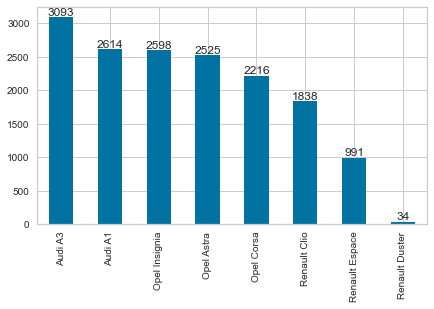

In [329]:
ax = df.make_model.value_counts().plot(kind ="bar")

ax.bar_label(ax.containers[0]);

# After the plot we will visualize is assigned to the variable ax first, 
# annotate can be added to all the bars in the table with the code "ax.bar_label(ax.containers[0])".
# Let's not forget that the matplotlib version must be 3.4 and above to run this code.

In [330]:
df2 = df.copy()

<AxesSubplot:xlabel='price', ylabel='Count'>

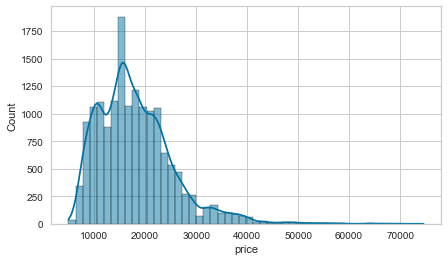

In [331]:
sns.histplot(df.price, bins=50, kde=True)

# Since linear models are very sensitive to outliers, I am trying to detect outliers in the data with histplot.

# Let's not forget that outlier for ML means that the data of a group or groups in our data is insufficient for training.
# By looking at the image below, we see that the number of vehicles over 40.000 EURO is very low. 
# Based on this image, we can evaluate that the number of vehicles over 40 thousand EURO may be 
# insufficient for training as a first insight. However, we cannot understand whether 
# it is inadequate or not without training. We should decide by both dropping the observations 
# that we consider as outliers and comparing the scores by doing the training without dropping them.

# Also, looking at the histplot for all the data may mislead us about the outlier. 
# For outlier detection, we should group the data in our data (Audi A3, Audi A1, Renault cilo, etc.) 
# and determine the outlier accordingly.

In [332]:
skew(df.price)

1.2368977644607202

<AxesSubplot:>

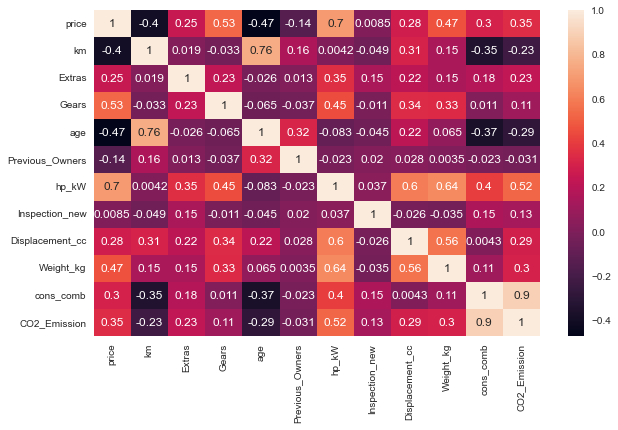

In [333]:
df_numeric = df.select_dtypes(include ="number")
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot =True)

# select_dtypes(include ="number") to filter out object features

## multicollinearity control

In [334]:
df_numeric.corr()[(abs(df_numeric.corr())>= 0.9) & (abs(df_numeric.corr()) < 1)].any().any()

# Corr between +/-0.9 and +/-1. We can check multicollinearity for values with this code.

False

## Outliers in Price Column

<AxesSubplot:xlabel='price'>

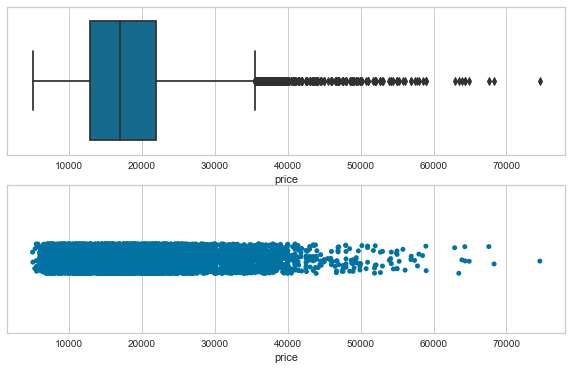

In [335]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.price)

plt.subplot(212)
sns.stripplot(df.price)

# We can get insights about outliers via boxplot. However, these insights can mislead us.
# In order to make more accurate comments, we can use the stripplot showing the distribution
# of categorical data. Although boxplot treats cars priced at 35 thousand EURO and above as outliers,
# stripplot tells us that the number of cars up to 40 EURO is not very few. But as we said above,
# our evaluation is not for the data in general. We will do it according to the groups in the data 
# (Audi A1, Audi A3, Reanult clio etc.).

<AxesSubplot:xlabel='make_model', ylabel='price'>

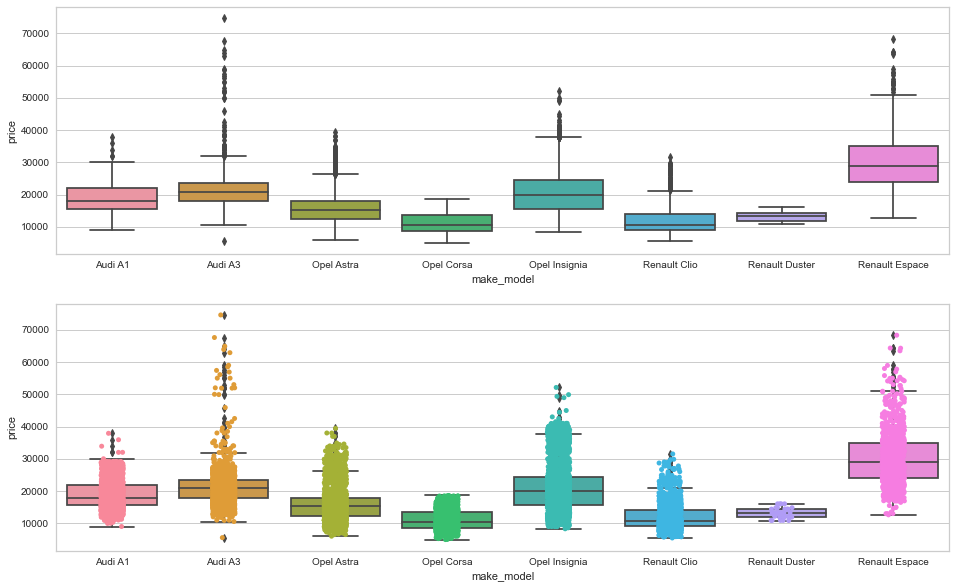

In [336]:
plt.figure(figsize=(16,10))
plt.subplot(211)
sns.boxplot(x="make_model", y="price", data=df, whis=1.5)

plt.subplot(212)
sns.boxplot(x="make_model", y="price", data=df, whis=1.5)
sns.stripplot(x="make_model", y="price", data=df)

# When we look at the images below, we can see that the outlier values, which are at 
# the limit of 1.5 wisker for Audi A3, Opel Astra, Opel insignia, Renault clio, 
# are actually sufficient data for training, according to the boxplot. In your own data,
# you can set separate wisker values ​​for each group according to these images.

In [337]:
df.make_model.unique()

array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Duster', 'Renault Espace'], dtype=object)

In [338]:
df[df["make_model"]== "Audi A1"]["price"]

# Prices of Audi A1s. We will try to determine the outlier values for each car using this code.

0       15770
1       14500
2       14640
3       14500
4       16790
        ...  
2609    21800
2610    21789
2611    21750
2612    21760
2613    21750
Name: price, Length: 2614, dtype: int64

In [339]:
total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

# According to the 1.5 wisker value, we identify the data that we consider to be outliers belonging to each group.

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 51   ,           The rate of outliers : 0.016
 The count of outlier for Opel Astra      : 134  ,           The rate of outliers : 0.053
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 114  ,           The rate of outliers : 0.044
 The count of outlier for Renault Clio    : 90   ,           The rate of outliers : 0.049
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 22   ,           The rate of outliers : 0.022

Total_outliers :  416 The rate of total outliers : 0.026


## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [340]:
X= df.drop(columns="price")
y= df.price

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### OneHotEncoder

#### Example

In [342]:
from sklearn.preprocessing import OneHotEncoder?

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")


# OneHotEncoder converts categorical features into dummies 0 and 1 featurs. All items under categorical 
# feature If we want our model to treat unique values equally, we can use the onehotencoder conversion algorithm.
# we convert our categorical data to 0s and 1s. We could also use the get_dummies() function for this conversion,
# but Since applying get_dummies() to all data and then separating the data into train and test sets will cause
# data leakege problem. Categorical observations for the data we prepared for ML models, onehotencoder conversion
# to dummies featurs converted using the algorithm.

# However, the following should not be forgotten when transforming categorical data: if a unique feature in 
# a categorical feature if there is a hierarchical superiority or ranking (expensive, normal, cheap or Large, average, small, etc.)
# among observations ordinalencoder conversion algorithm must be used.

# Conversion of categorical data to dummies featurs according to the unique categorical data in the train set 
# where the fit process was performed. makes. With the handle_unknown = "ignore" parameter, all categorical data 
# passed in the test set and not in the train set It is converted to 0. The default for this parameter is 
# handle_unknown = "error". If the handle_unknown parameter is default If it stays on, the onehotencoder 
# algorithm will give an error for an observation that is in the test set but not in the train set.

In [343]:
train = {"category":['good','bad','worst','good', 'good', 'bad', 'bed']}
test = {"category": ['bad','worst','good', 'good', 'bad', "bed", "resume", "car"]}
train = pd.DataFrame(train)
test = pd.DataFrame(test)
train

,category
0,good
1,bad
2,worst
3,good
4,good
5,bad
6,bed


In [344]:
test

,category
0,bad
1,worst
2,good
3,good
4,bad
5,bed
6,resume
7,car


In [345]:
enc.fit_transform(train[["category"]])
#enc.transform(train[["train"]])

# Since the fit process is done on the train set, the transformation (transformation) 
# in both the train and the test set will only be made according to the unique observations in the train set.

,category_bad,category_bed,category_good,category_worst
0,0.000,0.000,1.000,0.000
1,1.000,0.000,0.000,0.000
2,0.000,0.000,0.000,1.000
3,0.000,0.000,1.000,0.000
4,0.000,0.000,1.000,0.000
5,1.000,0.000,0.000,0.000
6,0.000,1.000,0.000,0.000


In [346]:
enc.transform(test[["category"]])
# Since the transformation in the test set is based on the unique observations in the train set,
# the unique in both the train and the test set observations were converted to 1,
# while non-observations (resume, car) were converted to 0.

,category_bad,category_bed,category_good,category_worst
0,1.000,0.000,0.000,0.000
1,0.000,0.000,0.000,1.000
2,0.000,0.000,1.000,0.000
3,0.000,0.000,1.000,0.000
4,1.000,0.000,0.000,0.000
5,0.000,1.000,0.000,0.000
6,0.000,0.000,0.000,0.000
7,0.000,0.000,0.000,0.000


In [347]:
enc.get_feature_names_out(["category"])

# onehotencoder algorithm creates a new feature for each unique observation and arranges 
# the feature names (old featuran name_unique observation name). It also drops the original featura before the conversion.

# As you can see, it converted the train featur into 'train_bad', 'train_bed', 'train_good', 'train_worst'.

array(['category_bad', 'category_bed', 'category_good', 'category_worst'],
      dtype=object)

In [348]:
pd.DataFrame(enc.fit_transform(train[["category"]]), columns = enc.get_feature_names_out(["category"]))

,category_bad,category_bed,category_good,category_worst
0,0.000,0.000,1.000,0.000
1,1.000,0.000,0.000,0.000
2,0.000,0.000,0.000,1.000
3,0.000,0.000,1.000,0.000
4,0.000,0.000,1.000,0.000
5,1.000,0.000,0.000,0.000
6,0.000,1.000,0.000,0.000


In [349]:
pd.DataFrame(enc.transform(test[["category"]]), columns = enc.get_feature_names_out(["category"]))

# When we name the features, we better see that the value 0 is assigned to the observations
# that are in the test set but not in the train set. (6th and 7th indexes)

,category_bad,category_bed,category_good,category_worst
0,1.000,0.000,0.000,0.000
1,0.000,0.000,0.000,1.000
2,0.000,0.000,1.000,0.000
3,0.000,0.000,1.000,0.000
4,1.000,0.000,0.000,0.000
5,0.000,1.000,0.000,0.000
6,0.000,0.000,0.000,0.000
7,0.000,0.000,0.000,0.000


### OrdinalEncoder

#### Example

In [350]:
train2 = {"category":['good','bad','worst','good', 'good', 'bad']}
test2 = {"category": ['bad','worst','good', 'good', 'bad']}
train2 = pd.DataFrame(train2)
test2 = pd.DataFrame(test2)
train2

# if unique categorical data under a featura have a hierarchical advantage over each other 
# (very bad, bad, good) or (cheap, average, expensive, very expensive) etc.
# If we want the model to treat all observations according to their superiority, 
# that is, not to treat them equally, we use the ordianlencoder conversion algorithm.

# NOTE: Ordinalencoder has a special use in tree-based models. In this usage, 
# we will always use ordinalencoder, regardless of whether the observations have a hierarchical
# superiority to each other. As for tree based models, this special usage will be explained in detail.

,category
0,good
1,bad
2,worst
3,good
4,good
5,bad


In [351]:
test2

,category
0,bad
1,worst
2,good
3,good
4,bad


In [352]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['worst','bad','good']

enc_2 = OrdinalEncoder(categories= [categories])

# Since there is a hierarchical ordering between unique observations, we will use ordinalencoder.
# By default, however, ordinalencoder performs the conversions according to the ordering of 
# the ASCII codes of the observations (i.e. alphabetical order). If we do not interfere with the model,
# the model will sort 'bad':0, 'good':1, 'worst':2. However, since this ordering will be wrong, 
# we have to manually give the hierarchical order to the model. If we give the order 
# as ['worst','bad','good'] as here, the model will transform 'worst':0, 'bad':1, 'good':2 according to this order.

In [353]:
enc_2.fit_transform(train2[["category"]])

array([[2.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.]])

In [354]:
enc_2.transform(test2[["category"]])

array([[1.],
       [0.],
       [2.],
       [2.],
       [1.]])

In [355]:
enc_2.get_feature_names_out(["category"])

# After ordinalencoder, the name of the feature does not change, 
# only the unique categorical data in the feature turns into numeric observations.

array(['category'], dtype=object)

### Converting Object Features into Numerical Features Using Make Column Transformer

In [356]:
cat_onehot = ['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type','Upholstery_type', 'Gearing_Type', 'Drive_chain']
cat_ordinal = ['Comfort_Convenience_Package', 'Entertainment_Media_Package', 'Safety_Security_Package']
    
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [357]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot), 
                                       (OrdinalEncoder(categories= [cat_for_comfort, cat_for_ent, cat_for_safety]), cat_ordinal),
                                       remainder='passthrough') # MinMaxScaler()


# make_column_transformer function automates transformations to featurs. 
# It transforms the featurs in order according to the order we will give into this function.

# What does the # (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot) code do?
# With the handle_unknown = "ignore" parameter, onehotencoder converts all featurs in the cat_onehot
# list so that all categorical data passed in the test set and not in the train set will be converted to 0.

# What does the (OrdinalEncoder(categories=categories), cat_ordinal) code do?
# After the onehotencoder conversion to the relevant featurs, all featurs in the cat_ordinal list 
# perform ordinal encoder conversion according to the hierarchical order of the unique categorical 
# observations in the categories list


# remainder='passthrough' means leave all other unconverted features as is.
# if the remainder is "dropped" with the default value, all non-converted featurs will be dropped from df.
# remainder= If we do MinMaxScaler() or StandardScale(), other features will be scaled except for the non-transformed features.

In [358]:
X_train.head()

,make_model,body_type,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
15488,Renault Espace,Van,1510.000,Used,Benzine,1,6.000,0.000,1.000,165.000,1,Metallic,Part/Full Leather,Automatic,1798.000,1734.000,front,6.800,153.000,Standard,Plus,Safety Premium Package
13676,Renault Clio,Sedans,89692.000,Used,Diesel,3,5.000,3.000,1.000,55.000,0,Metallic,Cloth,Manual,1461.000,1165.000,front,3.300,85.000,Standard,Plus,Safety Premium Plus Package
9325,Opel Corsa,Sedans,9090.000,Employee's car,Benzine,1,6.000,1.000,1.000,66.000,0,Metallic,Cloth,Automatic,1398.000,1199.000,front,5.900,137.000,Premium,Plus,Safety Premium Package
9968,Opel Corsa,Compact,1647.363,New,Benzine,2,6.000,0.000,1.000,66.000,0,Metallic,Cloth,Automatic,1398.000,1163.000,front,5.900,136.000,Premium,Plus,Safety Premium Package
7701,Opel Astra,Sedans,1500.000,Used,Benzine,1,6.000,0.000,1.000,112.000,0,Metallic,Cloth,Automatic,1399.000,1273.000,front,5.400,124.000,Standard,Plus,Safety Premium Package


In [359]:
X_test.head()

,make_model,body_type,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
227,Audi A1,Compact,36625.000,Used,Diesel,3,7.000,3.000,1.000,85.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1180.000,front,4.000,106.000,Premium,Standard,Safety Premium Package
7843,Opel Astra,Station wagon,7000.000,Used,Benzine,1,6.000,0.000,1.000,110.000,1,Metallic,Cloth,Automatic,1399.000,1425.000,front,5.500,127.000,Standard,Plus,Safety Premium Package
13774,Renault Clio,Sedans,59073.000,Used,Diesel,1,5.000,3.000,1.000,55.000,0,Metallic,Cloth,Manual,1461.000,1071.000,front,3.600,85.000,Standard,Standard,Safety Premium Package
11996,Opel Insignia,Sedans,21000.000,Used,Benzine,5,6.000,1.000,1.000,121.000,1,Metallic,Cloth,Automatic,1490.000,1503.000,front,6.100,138.000,Premium,Plus,Safety Premium Package
5785,Opel Astra,Station wagon,75700.000,Used,Diesel,6,6.000,3.000,2.000,100.000,1,Metallic,Part/Full Leather,Automatic,1598.000,1425.000,front,4.500,119.000,Standard,Plus,Safety Premium Package


In [360]:
X_train.shape, X_test.shape

((12727, 22), (3182, 22))

In [361]:
column_trans.fit_transform(X_train)

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.734e+03, 6.800e+00,
        1.530e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.165e+03, 3.300e+00,
        8.500e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.199e+03, 5.900e+00,
        1.370e+02],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.135e+03, 4.200e+00,
        9.700e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.135e+03, 4.600e+00,
        1.040e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.170e+03, 5.400e+00,
        1.200e+02]])

In [362]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

In [363]:
X_train_trans.shape, X_test_trans.shape

((12727, 49), (3182, 49))

In [364]:
features = column_trans.get_feature_names_out()

In [365]:
X_train= pd.DataFrame(X_train_trans, columns=features, index=X_train.index)
X_train.head()

,onehotencoder__make_model_Audi A1,onehotencoder__make_model_Audi A3,onehotencoder__make_model_Opel Astra,onehotencoder__make_model_Opel Corsa,onehotencoder__make_model_Opel Insignia,onehotencoder__make_model_Renault Clio,onehotencoder__make_model_Renault Duster,onehotencoder__make_model_Renault Espace,onehotencoder__body_type_Compact,onehotencoder__body_type_Convertible,onehotencoder__body_type_Coupe,onehotencoder__body_type_Off-Road,onehotencoder__body_type_Sedans,onehotencoder__body_type_Station wagon,onehotencoder__body_type_Transporter,onehotencoder__body_type_Van,onehotencoder__Type_Demonstration,onehotencoder__Type_Employee's car,onehotencoder__Type_New,onehotencoder__Type_Pre-registered,onehotencoder__Type_Used,onehotencoder__Fuel_Benzine,onehotencoder__Fuel_Diesel,onehotencoder__Fuel_LPG/CNG,onehotencoder__Paint_Type_Metallic,onehotencoder__Paint_Type_Perl effect,onehotencoder__Paint_Type_Uni/basic,onehotencoder__Upholstery_type_Cloth,onehotencoder__Upholstery_type_Part/Full Leather,onehotencoder__Gearing_Type_Automatic,onehotencoder__Gearing_Type_Manual,onehotencoder__Gearing_Type_Semi-automatic,onehotencoder__Drive_chain_4WD,onehotencoder__Drive_chain_front,onehotencoder__Drive_chain_rear,ordinalencoder__Comfort_Convenience_Package,ordinalencoder__Entertainment_Media_Package,ordinalencoder__Safety_Security_Package,remainder__km,remainder__Extras,remainder__Gears,remainder__age,remainder__Previous_Owners,remainder__hp_kW,remainder__Inspection_new,remainder__Displacement_cc,remainder__Weight_kg,remainder__cons_comb,remainder__CO2_Emission
15488,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,1510.000,1.000,6.000,0.000,1.000,165.000,1.000,1798.000,1734.000,6.800,153.000
13676,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,2.000,89692.000,3.000,5.000,3.000,1.000,55.000,0.000,1461.000,1165.000,3.300,85.000
9325,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,9090.000,1.000,6.000,1.000,1.000,66.000,0.000,1398.000,1199.000,5.900,137.000
9968,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,1647.363,2.000,6.000,0.000,1.000,66.000,0.000,1398.000,1163.000,5.900,136.000
7701,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,1500.000,1.000,6.000,0.000,1.000,112.000,0.000,1399.000,1273.000,5.400,124.000


In [366]:
X_test= pd.DataFrame(X_test_trans, columns=features, index=X_test.index)
X_test.head()

,onehotencoder__make_model_Audi A1,onehotencoder__make_model_Audi A3,onehotencoder__make_model_Opel Astra,onehotencoder__make_model_Opel Corsa,onehotencoder__make_model_Opel Insignia,onehotencoder__make_model_Renault Clio,onehotencoder__make_model_Renault Duster,onehotencoder__make_model_Renault Espace,onehotencoder__body_type_Compact,onehotencoder__body_type_Convertible,onehotencoder__body_type_Coupe,onehotencoder__body_type_Off-Road,onehotencoder__body_type_Sedans,onehotencoder__body_type_Station wagon,onehotencoder__body_type_Transporter,onehotencoder__body_type_Van,onehotencoder__Type_Demonstration,onehotencoder__Type_Employee's car,onehotencoder__Type_New,onehotencoder__Type_Pre-registered,onehotencoder__Type_Used,onehotencoder__Fuel_Benzine,onehotencoder__Fuel_Diesel,onehotencoder__Fuel_LPG/CNG,onehotencoder__Paint_Type_Metallic,onehotencoder__Paint_Type_Perl effect,onehotencoder__Paint_Type_Uni/basic,onehotencoder__Upholstery_type_Cloth,onehotencoder__Upholstery_type_Part/Full Leather,onehotencoder__Gearing_Type_Automatic,onehotencoder__Gearing_Type_Manual,onehotencoder__Gearing_Type_Semi-automatic,onehotencoder__Drive_chain_4WD,onehotencoder__Drive_chain_front,onehotencoder__Drive_chain_rear,ordinalencoder__Comfort_Convenience_Package,ordinalencoder__Entertainment_Media_Package,ordinalencoder__Safety_Security_Package,remainder__km,remainder__Extras,remainder__Gears,remainder__age,remainder__Previous_Owners,remainder__hp_kW,remainder__Inspection_new,remainder__Displacement_cc,remainder__Weight_kg,remainder__cons_comb,remainder__CO2_Emission
227,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,36625.000,3.000,7.000,3.000,1.000,85.000,0.000,1598.000,1180.000,4.000,106.000
7843,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,7000.000,1.000,6.000,0.000,1.000,110.000,1.000,1399.000,1425.000,5.500,127.000
13774,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,59073.000,1.000,5.000,3.000,1.000,55.000,0.000,1461.000,1071.000,3.600,85.000
11996,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,21000.000,5.000,6.000,1.000,1.000,121.000,1.000,1490.000,1503.000,6.100,138.000
5785,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,75700.000,6.000,6.000,3.000,2.000,100.000,1.000,1598.000,1425.000,4.500,119.000


<AxesSubplot:>

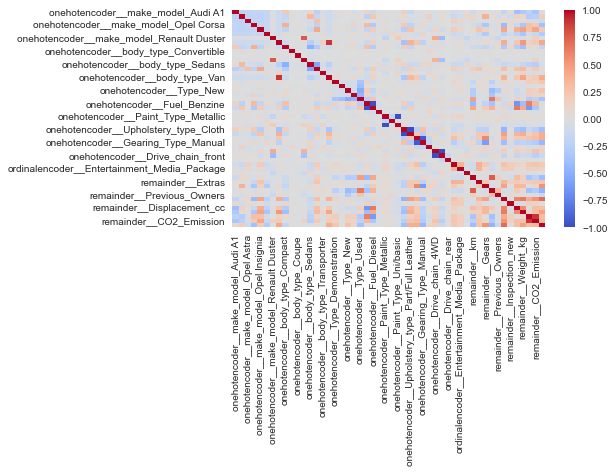

In [367]:
sns.heatmap(X_train.join(y_train).corr(), vmin=-1, vmax=1, cmap="coolwarm")

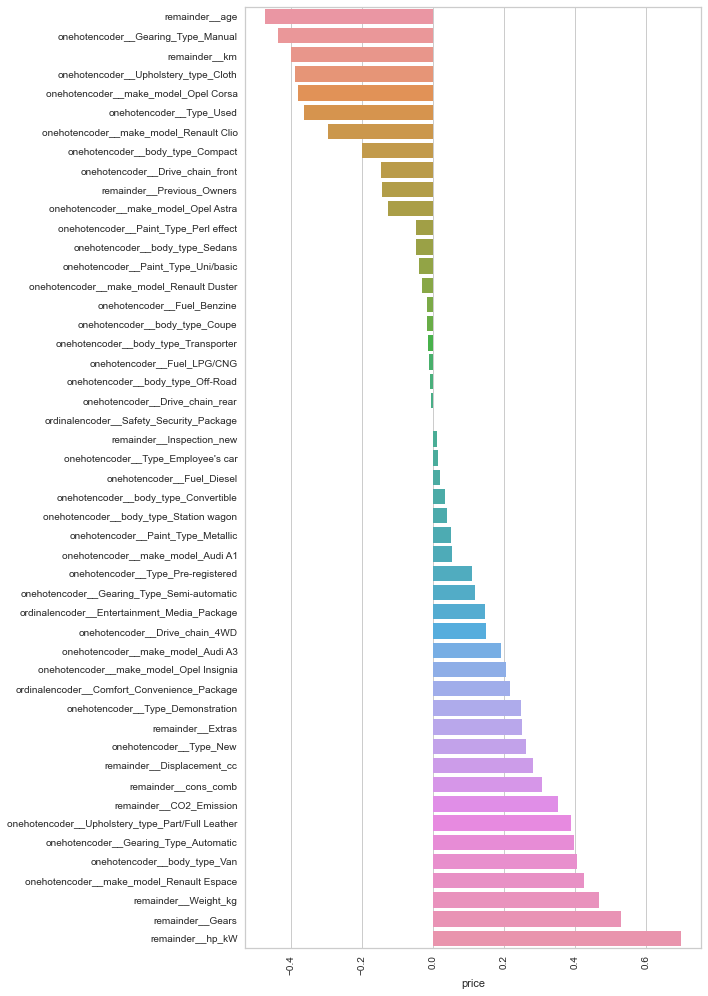

In [368]:
corr_by_price = X_train.join(y_train).corr()["price"].sort_values()[:-1]

plt.figure(figsize = (10,14))
sns.barplot(y = corr_by_price.index, x = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

### Scaling

In [369]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [370]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)


In [371]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [372]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.868,0.871
mae,1854.313,1856.252
mse,7224137.289,6870120.695
rmse,2687.776,2621.092


### Adjusted R2 Score

In [373]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

# There are too many featuras in our data, but not enough rows, which makes a false improvement 
# in our model's R2_score. Especially in such data or if too many new features (such as dummies feature) 
# have been added to our data, we must determine the real R2_score with the adjusted R2_score.


# Adjusted R2_score Checks the trade off between the number of rows and the feature, and returns us a score. 
# If there is a large imbalance between the numbers, there will be serious decreases in the adjusted_R2_score. 
# We define the above function for Adjusted R2 Score.

In [374]:
y_pred = lm.predict(X_test_scaled)

# We get our predictions (y_pred) from the model to use it in the function we defined above.

In [375]:
adj_r2(y_test, y_pred, X)

# We get our score by giving the necessary parameters to the function.

0.8707754204638536

### Cross Validate

In [376]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10,
             return_train_score=True)

# as we learned in our previous lessons, we get overfiting control through cross validaition.
# We do this by comparing the train and validation scores.

In [377]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.024,0.001,0.862,0.868,-1860.699,-1855.724,-7440579.219,-7211096.839,-2727.743,-2685.349
1,0.064,0.001,0.866,0.868,-1928.755,-1848.436,-7612032.524,-7184366.915,-2758.991,-2680.367
2,0.011,0.001,0.869,0.868,-1903.678,-1855.176,-7155519.167,-7240149.314,-2674.980,-2690.753
3,0.062,0.001,0.857,0.869,-1854.796,-1854.966,-7848763.110,-7156771.352,-2801.564,-2675.214
4,0.011,0.001,0.858,0.869,-1955.118,-1843.739,-8627920.290,-7079693.204,-2937.332,-2660.769
5,0.011,0.001,0.875,0.867,-1799.667,-1865.696,-6813800.795,-7271823.461,-2610.326,-2696.632
6,0.016,0.001,0.872,0.867,-1798.339,-1867.296,-6293661.484,-7337406.629,-2508.717,-2708.765
7,0.011,0.001,0.871,0.867,-1876.693,-1847.844,-7404531.784,-7212782.754,-2721.127,-2685.662
8,0.048,0.002,0.867,0.868,-1823.514,-1863.536,-6952805.535,-7265312.228,-2636.817,-2695.424
9,0.014,0.002,0.866,0.868,-1853.823,-1856.633,-7046391.248,-7261778.803,-2654.504,-2694.769


In [378]:
pd.DataFrame(scores).iloc[:, 2:].mean()

# We see that the scores between the train and validaiton set and the train set are close to each other. 
# There is no overfitting.

test_r2                                    0.866
train_r2                                   0.868
test_neg_mean_absolute_error           -1865.508
train_neg_mean_absolute_error          -1855.905
test_neg_mean_squared_error         -7319600.515
train_neg_mean_squared_error        -7222118.150
test_neg_root_mean_squared_error       -2703.210
train_neg_root_mean_squared_error      -2687.370
dtype: float64

In [379]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.868,0.871
mae,1854.313,1856.252
mse,7224137.289,6870120.695
rmse,2687.776,2621.092


In [380]:
2622/df.price.mean()

# According to the rmse score we get from the test set (hold out set) score we will give to the customer,
# our model makes an average of 14.5% errors.

0.1455030414181288

### Prediction Error with Outliers

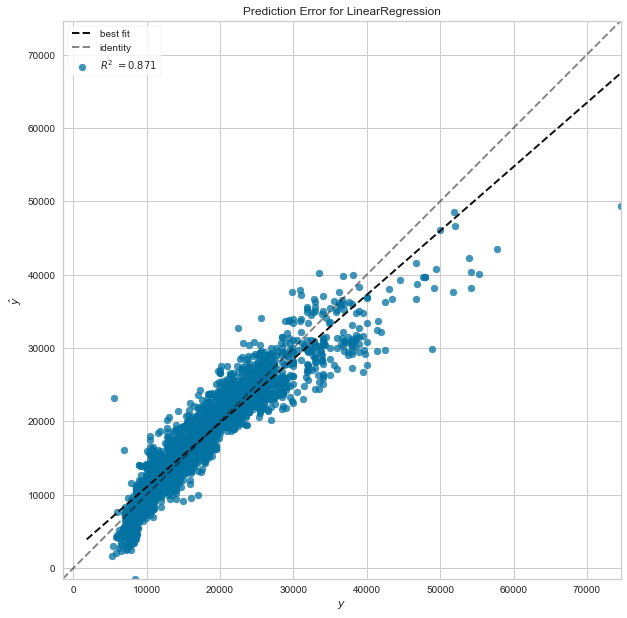

In [381]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

# With the prediciton error image, we can see how good our model's predictions are.
# When we look at the image below, we can see that cars with a price of 40 thousand EURO 
# and above pull down our best fit line.

# We will continue by removing outlier values from our data in this notebook. 
# However, you can remove the cars with prices of 40 thousand EURO and above 
# from your data and observe your scores.

### Residual Plot with Outliers

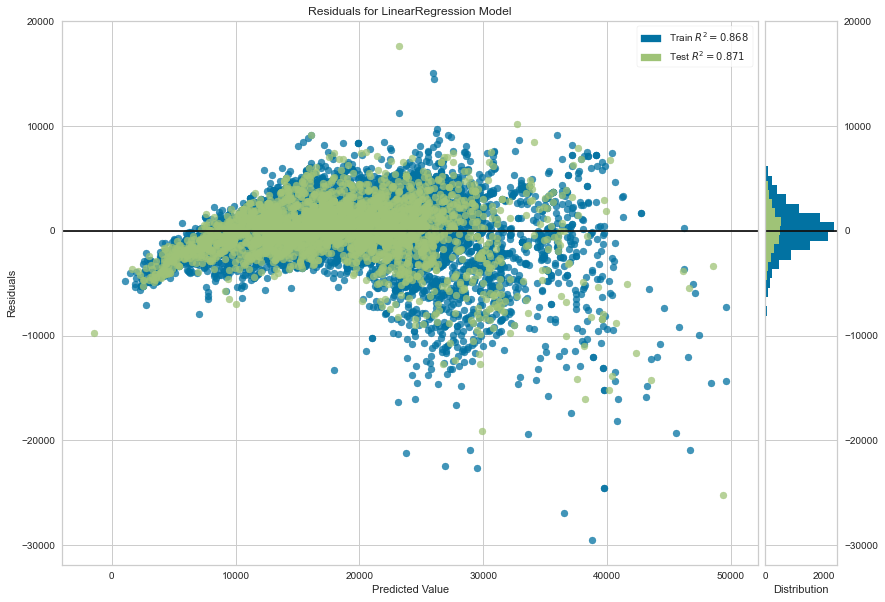

In [382]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();       

### Dropping outliers that worsen my predictions from the dataset

In [383]:
for model in df2.make_model.unique():
    
    car_prices = df2[df2["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR

    drop_index = df2[df2["make_model"]== model][(car_prices < lower_lim) | (car_prices > upper_lim)].index
    df2.drop(index = drop_index, inplace=True)
    df2.reset_index(drop=True, inplace=True)
df2
# Here we remove outlier observations from our data. 
# we determine the lower and upper limits,
# determine the indexes of the car prices outside these limits,
# drop these indexes from our data, 
# ignore the indexes we drop and use reset_index to make the index order properly.

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,3,7.000,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800,99.000,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,4,7.000,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600,129.000,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,2,7.000,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800,99.000,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,3,6.000,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800,99.000,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,4,7.000,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100,109.000,Premium,Plus,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15488,Renault Espace,Van,39950,1647.363,New,Diesel,2,6.000,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300,139.000,Premium,Plus,Safety Premium Package
15489,Renault Espace,Van,39885,9900.000,Used,Benzine,3,7.000,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400,168.000,Premium,Plus,Safety Premium Package
15490,Renault Espace,Van,39875,15.000,Pre-registered,Diesel,1,6.000,0.000,1.000,146.000,1,Metallic,Part/Full Leather,Automatic,1997.000,1734.000,front,5.300,139.000,Standard,Plus,Safety Premium Package
15491,Renault Espace,Van,39700,10.000,Pre-registered,Diesel,2,6.000,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300,139.000,Standard,Plus,Safety Premium Package


In [384]:
df3 = df2.copy()

In [385]:
X = df2.drop(columns = "price")
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [386]:
X_train= pd.DataFrame(column_trans.fit_transform(X_train), columns=features, index=X_train.index)
X_test= pd.DataFrame(column_trans.transform(X_test), columns=features, index=X_test.index)

In [387]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [388]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

LinearRegression()

### Prediction Error without Outliers

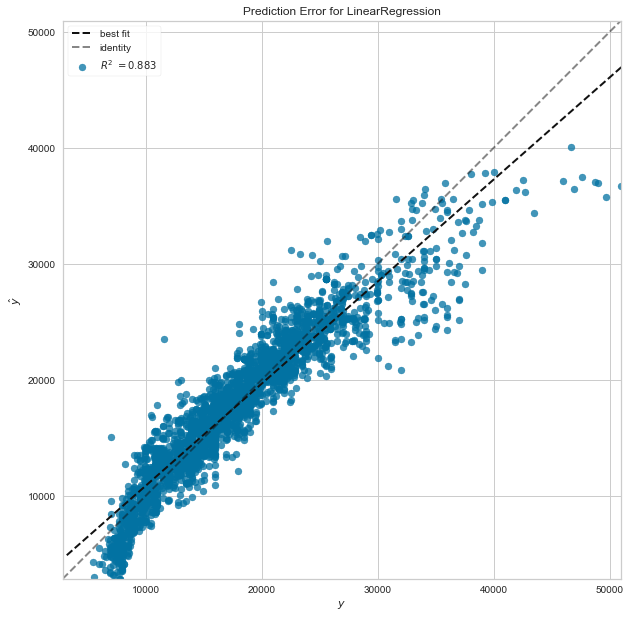

In [389]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

# After removing the outlier values, we see that the angle between the best fit line and the identity line narrows even more.

### Residual Plot without Outliers

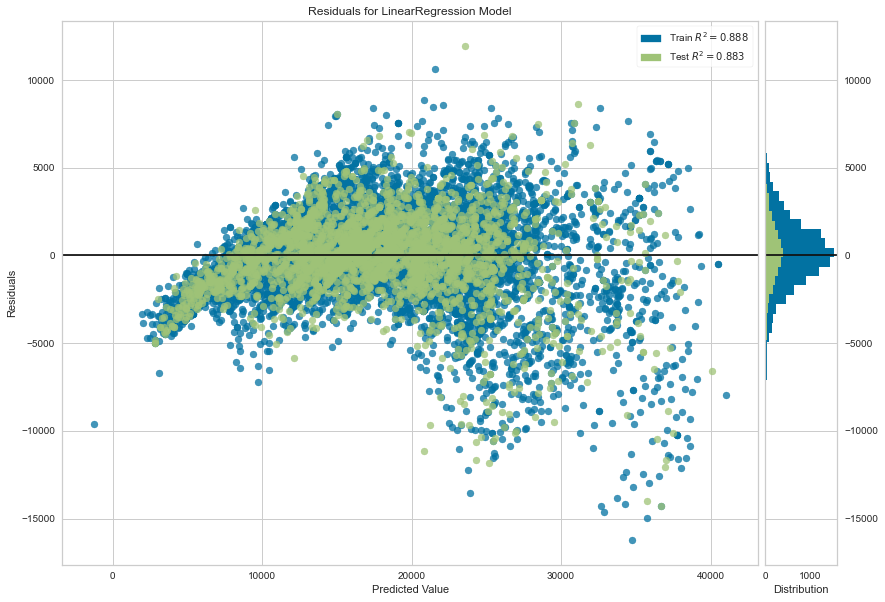

In [390]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show(); 

In [391]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

# We can see that the results are getting better after outliers are out.

,train,test
R2,0.888,0.883
mae,1629.514,1600.107
mse,5170544.784,5103272.902
rmse,2273.883,2259.042


In [392]:
2256/df2.price.mean()

# Our average guessing error before kicking out the outliers dropped from 14.55% to 12.83%.
# There was an improvement in our estimates of about 2%.

0.12833878181804398

In [393]:
2622/df.price.mean()

0.1455030414181288

In [394]:
model = LinearRegression() #normalize=True
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

# We are checking overfitting according to our new data.

In [395]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

# Since the train and validation scores are close, we can say that there is no overfiting problem.

test_r2                                    0.887
train_r2                                   0.888
test_neg_mean_absolute_error           -1635.058
train_neg_mean_absolute_error          -1628.514
test_neg_mean_squared_error         -5229576.523
train_neg_mean_squared_error        -5172194.318
test_neg_root_mean_squared_error       -2285.653
train_neg_root_mean_squared_error      -2274.231
dtype: float64

In [396]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

# Since the test scores we will present to the customer and the validation scores 
# we get from the CV are close to each other, we can say that the scores we get from 
# the test (hold out) set are consistent scores.

,train,test
R2,0.888,0.883
mae,1629.514,1600.107
mse,5170544.784,5103272.902
rmse,2273.883,2259.042


In [397]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# We assign the scores to the variables to compare the scores we get from the linear model.

In [398]:
pd.DataFrame(lm2.coef_, index = X_train.columns, columns=["Coef"])
# The coefficients of the features with onehot encoder applied are very high. Dummy variable trap

# https://geoffruddock.com/one-hot-encoding-plus-linear-regression-equals-multi-collinearity/

,Coef
onehotencoder__make_model_Audi A1,4631088631144003.000
onehotencoder__make_model_Audi A3,4631088631145347.000
onehotencoder__make_model_Opel Astra,4631088631140146.000
onehotencoder__make_model_Opel Corsa,4631088631138536.000
onehotencoder__make_model_Opel Insignia,4631088631143604.000
onehotencoder__make_model_Renault Clio,4631088631138580.000
onehotencoder__make_model_Renault Duster,4631088631134526.000
onehotencoder__make_model_Renault Espace,4631088631149448.000
onehotencoder__body_type_Compact,-7549566853707258.000
onehotencoder__body_type_Convertible,-7549566853709880.000


## Pipeline

In [399]:
X = df2.drop(columns = ["price"])
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# After dropping outlier observations, we divide the remaining data into X and y and divide it into train and test sets.

In [400]:
X_train.head()

,make_model,body_type,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
5818,Opel Astra,Station wagon,66535.000,Used,Diesel,2,6.000,2.000,2.000,100.000,1,Metallic,Cloth,Automatic,1598.000,1550.000,front,4.500,119.000,Premium,Plus,Safety Premium Package
12640,Opel Insignia,Sedans,8650.000,Used,Benzine,2,6.000,0.000,1.000,121.000,0,Metallic,Part/Full Leather,Manual,1490.000,1503.000,front,6.000,136.000,Premium,Plus,Safety Premium Package
4447,Audi A3,Sedans,3000.000,Used,Benzine,1,7.000,1.000,1.000,85.000,0,Uni/basic,Cloth,Automatic,999.000,1275.000,front,5.100,117.000,Standard,Plus,Safety Premium Package
6061,Opel Astra,Station wagon,89738.000,Used,Benzine,4,6.000,3.000,2.000,103.000,0,Metallic,Cloth,Manual,1364.000,1425.000,front,5.600,133.000,Standard,Standard,Safety Premium Package
9991,Opel Corsa,Sedans,50.000,Pre-registered,Benzine,3,5.000,0.000,1.000,51.000,0,Metallic,Cloth,Manual,1229.000,1163.000,front,5.300,124.000,Standard,Plus,Safety Premium Package


In [401]:
cat_onehot = ['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type','Upholstery_type', 'Gearing_Type', 'Drive_chain']
cat_ordinal = ['Comfort_Convenience_Package', 'Entertainment_Media_Package', 'Safety_Security_Package']
    
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [402]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_comfort, cat_for_ent, cat_for_safety])

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                       remainder='passthrough') # MinMaxScaler()


In [403]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]

ridge_pipe = Pipeline(steps=operations)

ridge_pipe.fit(X_train, y_train)

# The first operation in the pipe_model is column_trans;
# 1. Onehotencoder conversion is done to featurs (cat_onehot) in X data that will apply onehotencoder conversion.
# 2. Ordinalencoder conversion is done to featurs (cat_ordinal) in X data to which ordinalencoder conversion will be applied.
# 3. Except for the converted features, no action is taken on the remaining features, they are left as is.

# Since the second action in the pipe_model is MinMaxScaler();
# 4. After the transformation, minmax scale is applied to the new numeric X we get. Dummies featurs consisting of 0s and 1s in our data
# Since minmaxscale was applied so that these observations remain 0 and 1 again.

# The third action in pipe_model is Lasso();
# 5. Transformed and scaled X together with y Lasso are given to the model and the training is completed.

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

## Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Ridge

In [404]:
from sklearn.linear_model import Ridge

In [405]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)

ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [406]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.888,0.884
mae,1627.573,1597.596
mse,5169904.474,5092455.314
rmse,2273.742,2256.647


## Cross Validation

In [407]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

In [408]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.887
train_r2                                   0.888
test_neg_mean_absolute_error           -1633.824
train_neg_mean_absolute_error          -1627.370
test_neg_mean_squared_error         -5219722.126
train_neg_mean_squared_error        -5167461.404
test_neg_root_mean_squared_error       -2283.511
train_neg_root_mean_squared_error      -2273.190
dtype: float64

## Finding best alpha for Ridge

In [409]:
from sklearn.model_selection import GridSearchCV

In [410]:
alpha_space = np.linspace(0.01, 100, 100)

In [411]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]
pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha':alpha_space}  # Parametre isimleri pipeline da tanımlanan model ismi ile birlikte kullanılmalıdır.

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [412]:
pipe_model.get_params()  # to see the parameters of the model defined with pipeline

{'memory': None,
 'steps': [('OneHot_Ordinal_Encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['make_model', 'body_type', 'Type', 'Fuel',
                                     'Paint_Type', 'Upholstery_type',
                                     'Gearing_Type', 'Drive_chain']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Standard',
                                                                'Premium',
                                                                'Premium Plus'],
                                                               ['Standard',
                                                                'Plus'],
                                            

In [413]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [414]:
ridge_grid_model.best_estimator_

# Returns values other than default from hyperparameters, 
# but if our best alpha value after gridsearch was 1, it would not display 1 here.

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge(alpha=1.02))])

In [415]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[ridge_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2283.515
mean_train_score   -2273.203
Name: 1, dtype: object

In [416]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.888,0.884
mae,1627.568,1597.590
mse,5169954.570,5092452.496
rmse,2273.753,2256.646


In [417]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [418]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge(alpha=1.02))]

ridge_model = Pipeline(steps=operations)

ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge(alpha=1.02))])

In [419]:
pd.DataFrame(ridge_model["Ridge"].coef_, index = ridge_model["OneHot_Ordinal_Encoder"].get_feature_names_out(), columns=["Coef"]).sort_values("Coef")

# In order to get the coefficients and feature names, 
# the model and encoder name you know through the model created with 
# the pipeline should be used as a key.

,Coef
remainder__km,-10603.889
onehotencoder__make_model_Renault Duster,-6815.542
remainder__age,-5275.985
onehotencoder__make_model_Opel Corsa,-3358.410
onehotencoder__make_model_Renault Clio,-3254.718
remainder__CO2_Emission,-2484.054
onehotencoder__body_type_Convertible,-1889.742
onehotencoder__Gearing_Type_Manual,-1697.538
onehotencoder__make_model_Opel Astra,-1679.432
onehotencoder__Drive_chain_rear,-1577.705


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [420]:
from sklearn.linear_model import Lasso

In [421]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [422]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.888,0.884
mae,1629.119,1596.424
mse,5177208.946,5085246.452
rmse,2275.348,2255.049


## Cross Validation

In [435]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(max_iter=1200000))]

model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10, return_train_score=True)

In [436]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.887
train_r2                                   0.888
test_neg_mean_absolute_error           -1634.322
train_neg_mean_absolute_error          -1628.847
test_neg_mean_squared_error         -5216126.030
train_neg_mean_squared_error        -5174321.986
test_neg_root_mean_squared_error       -2282.698
train_neg_root_mean_squared_error      -2274.698
dtype: float64

## Finding best alpha for Lasso

In [439]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(max_iter=1200000))]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space}  # Parametre isimleri pipeline da tanımlanan model ismi ile birlikte kullanılmalıdır.

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [440]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [441]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[lasso_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2282.711
mean_train_score   -2274.750
Name: 1, dtype: object

In [442]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.888,0.884
mae,1629.137,1596.409
mse,5177409.984,5085291.420
rmse,2275.392,2255.059


In [443]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [444]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=1.02))])

In [446]:
pd.DataFrame(lasso_model["Lasso"].coef_, index = lasso_model["OneHot_Ordinal_Encoder"].get_feature_names_out(), columns=["Coef"]).sort_values("Coef")

,Coef
remainder__km,-10580.701
onehotencoder__make_model_Renault Duster,-6821.054
remainder__age,-5263.686
onehotencoder__make_model_Opel Corsa,-3554.909
onehotencoder__make_model_Renault Clio,-3396.189
onehotencoder__make_model_Opel Astra,-1880.020
onehotencoder__Gearing_Type_Manual,-1728.303
remainder__CO2_Emission,-1499.373
remainder__Weight_kg,-1034.395
onehotencoder__body_type_Transporter,-930.121


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [447]:
from sklearn.linear_model import ElasticNet

In [448]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('ElasticNet', ElasticNet())])

In [449]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.508,0.505
mae,3671.788,3559.718
mse,22739690.270,21651490.137
rmse,4768.615,4653.116


## Cross Validation

In [450]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

In [451]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                     0.508
train_r2                                    0.509
test_neg_mean_absolute_error            -3671.517
train_neg_mean_absolute_error           -3669.248
test_neg_mean_squared_error         -22737008.635
train_neg_mean_squared_error        -22704157.757
test_neg_root_mean_squared_error        -4766.857
train_neg_root_mean_squared_error       -4764.876
dtype: float64

## Finding best alpha and l1_ratio for ElasticNet

In [452]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'ElasticNet__l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [453]:
elastic_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Type',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[...
                                                                                                     'Premium '
                                                                                                     'Plus '
                                                                                                     'Package']]),
                                                                         ['Comfort_Convenience_Package',
                                                                          'Entertainment_Media_Package',
                                                                          'Safety_Security_Package'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('ElasticNet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'ElasticNet__alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'ElasticNet__l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99,
                                                  1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [454]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[elastic_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2282.711
mean_train_score   -2274.750
Name: 5, dtype: object

In [455]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.888,0.884
mae,1629.137,1596.409
mse,5177409.984,5085291.420
rmse,2275.392,2255.059


In [456]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Feature İmportance

In [457]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
model = Pipeline(steps=operations)
model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'Type', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Comfort_Convenience_Package',
                                                   'Entertainment_Media_Package',
                                                   'Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=1.02))])

In [458]:
df_feat_imp = pd.DataFrame(model["Lasso"].coef_, index = model["OneHot_Ordinal_Encoder"].get_feature_names_out(), columns=["Coef"]).sort_values("Coef")

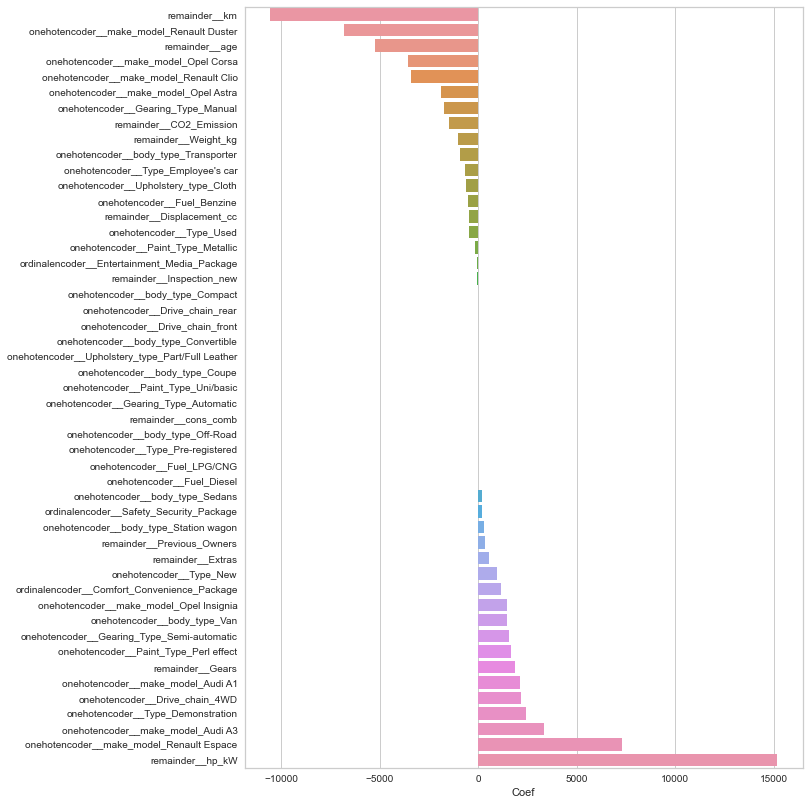

In [459]:
plt.figure(figsize=(10,14))
sns.barplot(data= df_feat_imp, x=df_feat_imp.Coef, y=df_feat_imp.index);

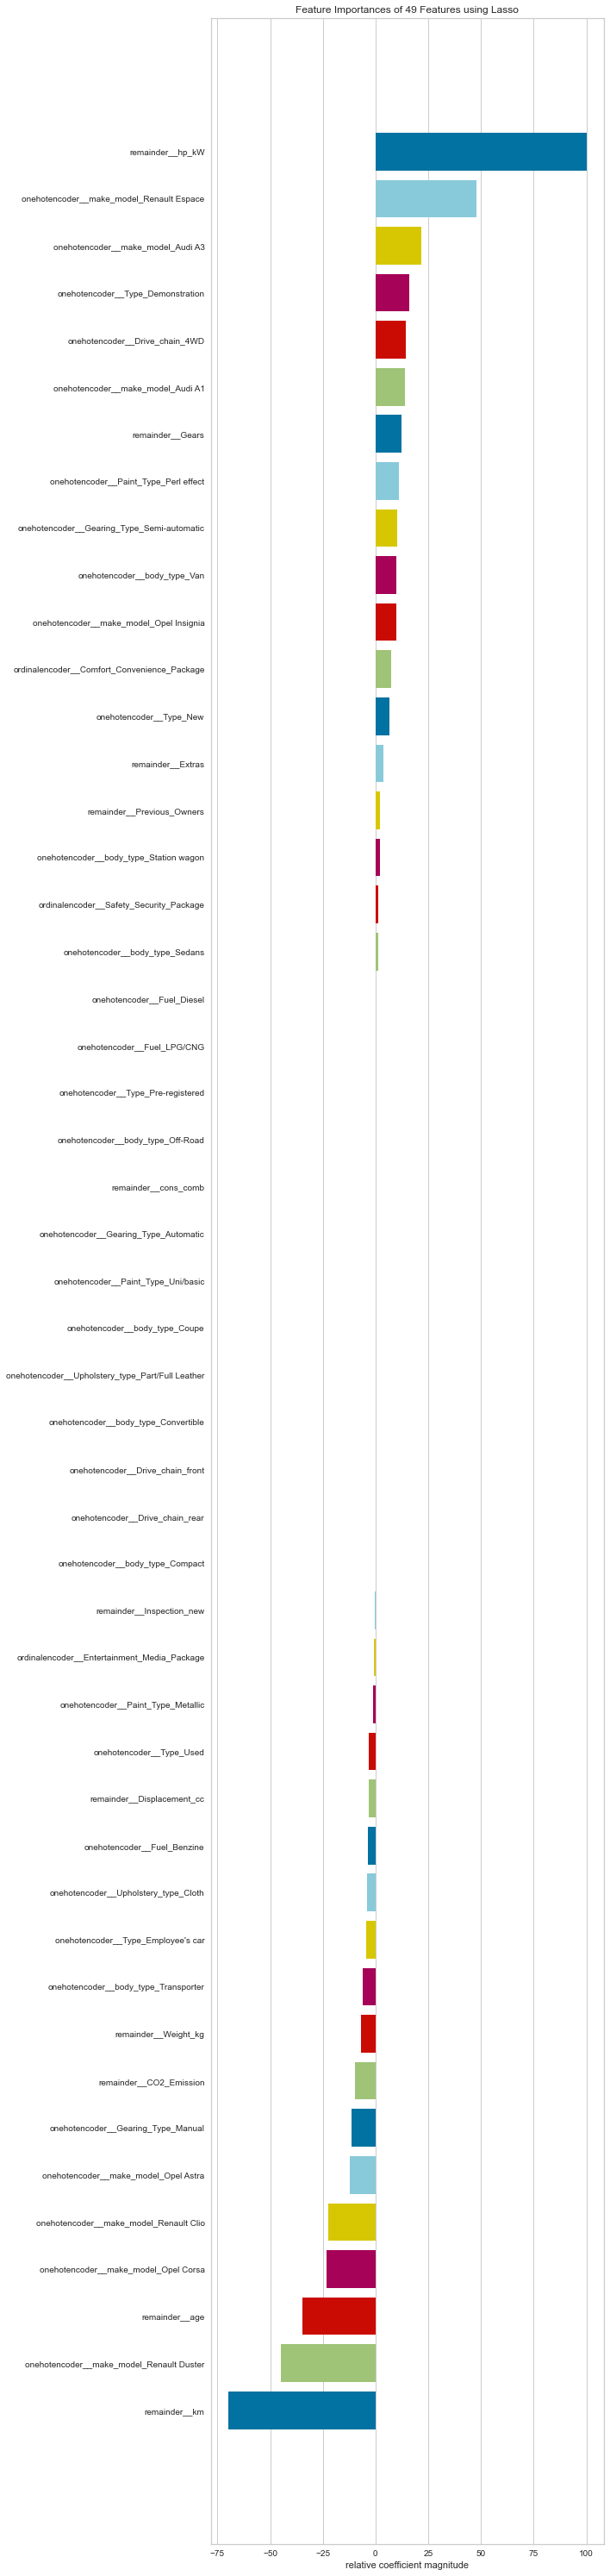

In [460]:
# Cannot view feature importance with yellowbrick when using pipeline.

from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

X_train_trans= column_trans.fit_transform(X_train)
X_train_scaled= scaler.fit_transform(X_train_trans)
model = Lasso(alpha=1.02)

viz = FeatureImportances(model, labels=column_trans.get_feature_names_out())
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# We do not forget that we need to use the lasso model, as we will do a # feature selection.

In [461]:
df_new = df2[["make_model", "hp_kW", "km","age", "Gearing_Type", "Gears", "Type", 'Safety_Security_Package', "price"]]

# we select the top 7 features that have the most impact on prediction. 
# Here, a question may come up as why the make_model feature was chosen. 
# When the above image is examined, we also chose the make_model feature 
# since we saw that the make_model feature has unique categorical observations 
# (Audi A3, AudiA1, Renault Espace etc.) among the featurs that have the most impact on estimation.

# Although the 'Safety_Security_Package' featura doesn't do much for estimation,
# it has been chosen below to show how we use ordinalencoder conversions with code that we'll automate.


In [462]:
df_new

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package,price
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000,Used,Safety Premium Package,15770
1,Audi A1,141.000,80000.000,2.000,Automatic,7.000,Used,Safety Premium Package,14500
2,Audi A1,85.000,83450.000,3.000,Automatic,7.000,Used,Safety Premium Package,14640
3,Audi A1,66.000,73000.000,3.000,Automatic,6.000,Used,Safety Premium Package,14500
4,Audi A1,66.000,16200.000,3.000,Automatic,7.000,Used,Safety Premium Package,16790
...,...,...,...,...,...,...,...,...,...
15488,Renault Espace,147.000,1647.363,0.000,Automatic,6.000,New,Safety Premium Package,39950
15489,Renault Espace,165.000,9900.000,0.000,Automatic,7.000,Used,Safety Premium Package,39885
15490,Renault Espace,146.000,15.000,0.000,Automatic,6.000,Pre-registered,Safety Premium Package,39875
15491,Renault Espace,147.000,10.000,0.000,Automatic,6.000,Pre-registered,Safety Premium Package,39700


In [463]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# According to our new 7-featured dataset, 
# we determine our X and y and rebuild the model. And we repeat the operations we did above.

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [465]:
X_train.head()

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package
5818,Opel Astra,100.000,66535.000,2.000,Automatic,6.000,Used,Safety Premium Package
12640,Opel Insignia,121.000,8650.000,0.000,Manual,6.000,Used,Safety Premium Package
4447,Audi A3,85.000,3000.000,1.000,Automatic,7.000,Used,Safety Premium Package
6061,Opel Astra,103.000,89738.000,3.000,Manual,6.000,Used,Safety Premium Package
9991,Opel Corsa,51.000,50.000,0.000,Manual,5.000,Pre-registered,Safety Premium Package


In [466]:
cat_onehot = ['make_model', 'Type', 'Gearing_Type']
cat_ordinal = ['Safety_Security_Package']

Safety_Security_Package = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']
    
categories = [Safety_Security_Package]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), 
                                       (OrdinalEncoder(categories=categories), cat_ordinal),
                                       remainder='passthrough') #MinMaxScaler()

In [467]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.882,0.879
mae,1656.817,1619.918
mse,5470129.665,5304445.257
rmse,2338.831,2303.138


## Cross Validate

In [468]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10, return_train_score=True)

In [469]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.881
train_r2                                   0.882
test_neg_mean_absolute_error           -1659.164
train_neg_mean_absolute_error          -1656.716
test_neg_mean_squared_error         -5489269.264
train_neg_mean_squared_error        -5469107.920
test_neg_root_mean_squared_error       -2341.656
train_neg_root_mean_squared_error      -2338.596
dtype: float64

In [470]:
2303/df_new.price.mean()

0.13101250643925322

In [471]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 7. Visually Compare Models Performance In a Graph

In [472]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.883,1600.107,2259.042
ridge_m,0.884,1597.590,2256.646
lasso_m,0.884,1596.409,2255.059
elastic_m,0.884,1596.409,2255.059
final_m,0.879,1619.918,2303.138


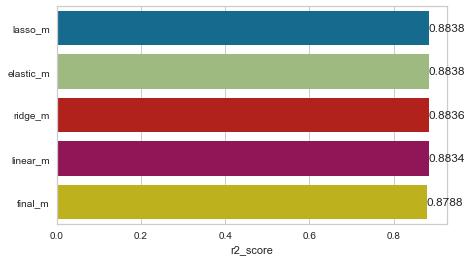

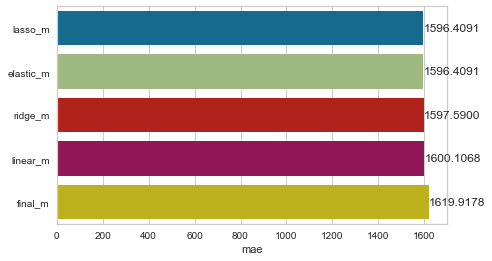

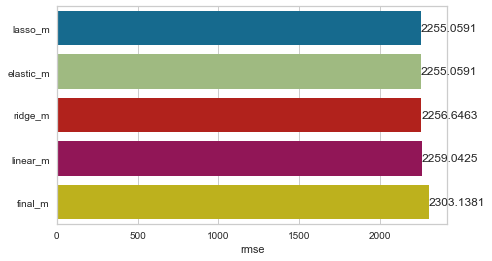

In [473]:
# metrics = scores.columns

for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False # if our metric is r2_score the barplot will be sorted from largest to smallest
    else:
        ascending = True # if our metric is mae or rmse then the barplot will be sorted from smallest to largest
    compare = scores.sort_values(by=j, ascending=ascending) # Reordering compare df by relevant metric
    ax = sns.barplot(x = compare[j] , y= compare.index) # Metric scores for compare[j] from compare df are drawn sequentially
                                                        # and visualized on the barplot.
                                                        # y=compare.index will write the model names on the y-axis of our image.
    ax.bar_label(ax.containers[0], fmt="%.4f"); # annotate It is arranged as 4 digits from ".".

## Prediction new observation

In [474]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# After trying all models and deciding on the model with the most optimal score, 
# we separate the data we use for this model as X and y.
# Note that we do not distinguish between train and test sets in the final stage.

In [475]:
X.head()

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000,Used,Safety Premium Package
1,Audi A1,141.000,80000.000,2.000,Automatic,7.000,Used,Safety Premium Package
2,Audi A1,85.000,83450.000,3.000,Automatic,7.000,Used,Safety Premium Package
3,Audi A1,66.000,73000.000,3.000,Automatic,6.000,Used,Safety Premium Package
4,Audi A1,66.000,16200.000,3.000,Automatic,7.000,Used,Safety Premium Package


In [476]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
final_model = Pipeline(steps=operations)

# we build the model with the best hyperparameter we found above.

In [477]:
final_model.fit(X, y)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'Type',
                                                   'Gearing_Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Safety_Security_Package'])])),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=1.02))])

In [478]:
my_dict = {
    "make_model": 'Audi A3',
    "hp_kW": 66,
    "km": 17000,
    "age": 2,
    "Gearing_Type": "Automatic",
    "Gears": 7,
    "Type":"Used",
    'Safety_Security_Package':'Safety Premium Package'
}

In [479]:
X.head()

# The feature order of the observation we will predict should be the same as the feature order of the data we train.

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000,Used,Safety Premium Package
1,Audi A1,141.000,80000.000,2.000,Automatic,7.000,Used,Safety Premium Package
2,Audi A1,85.000,83450.000,3.000,Automatic,7.000,Used,Safety Premium Package
3,Audi A1,66.000,73000.000,3.000,Automatic,6.000,Used,Safety Premium Package
4,Audi A1,66.000,16200.000,3.000,Automatic,7.000,Used,Safety Premium Package


In [480]:
new_obs = pd.DataFrame([my_dict])
new_obs

# feature sıralamalarının aynı olduğunu gördük

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package
0,Audi A3,66,17000,2,Automatic,7,Used,Safety Premium Package


In [481]:
final_model.predict(new_obs)

array([19600.25569825])

In [482]:
# when feature order is different
my_dict = {
    "make_model": 'Audi A3',
    "km": 17000,
    "hp_kW": 66,
    "age": 2,
    "Gearing_Type": "Automatic",
    "Gears": 7,
    "Type":"Used",
    'Safety_Security_Package':'Safety Premium Package'
}

new_obs = pd.DataFrame([my_dict])
new_obs

,make_model,km,hp_kW,age,Gearing_Type,Gears,Type,Safety_Security_Package
0,Audi A3,17000,66,2,Automatic,7,Used,Safety Premium Package


In [483]:
final_model.predict(new_obs)

# new_obs and X's feature order is different. make_column_transformer detects this difference and adapts new_obs' 
# feature order to the feature order of the X data it is training.

array([19600.25569825])

In [484]:
# What does pipe_model.predict(new_obs) do in order?
# The first operation in the pipe_model is column_trans;
# 1. Onehotencoder conversion is performed according to the information of X data to the featurs (cat_onehot)
# to be applied onehotencoder conversion in new_obs data.
# 2. Ordinalencoder conversion is performed according to the information of X data to the featurs (cat_ordinal)
# in the new_obs data to be converted to ordinalencoder.
# 3. The new_obs data is left as is, without any action, except for the converted featurs.
# Since the second action in the pipe_model is MinMaxScaler();
# 4. After the transformation, minmax scale is applied to the new numeric new_obs we get,
# according to the min and max information of the X data.
# The third action in the pipe_model is Lasso();
# 5. The new_obs data transformed and scaled according to X's information is predicted by the Lasso model.

In [485]:
# Important note: make_column_transformer function assigns categorical features 
# to the beginning of df and numeric features to the end of df in accordance with 
# the transformation order in the df it transforms.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___